In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Mounted at /content/drive


In [ ]:
train_dir=r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/train'
validation_dir=r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/validation'
test_dir=r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40, #rotation from -40 to 40
                                 width_shift_range=0.2, #shifting image by 20% of total width
                                 height_shift_range=0.2, #shifting image by 20% of total height
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 )
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2020 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras.applications import InceptionResNetV2
conv_base=InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(150,150,3)) # weights=imagenet means we want weights after training in ilvrc competition
# include_top=False means we want only the conv layer if we want the whole model then it would be true
conv_base.summary()

219055592/219055592 [==============================] - 2s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
             

In [ ]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense (Dense)               (None, 1024)              14156800  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 68,494,561
Trainable params: 68,434,017
Non-trainable params: 60,544
_______________________________________

In [ ]:
conv_base.trainable=False # NO need to train parameters of conv_base

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=2e-5),metrics=['acc']) #RMSprop is better than sgd for image processing
# smaller learning rate is used beacuse we are fine tuning already trained weights of conv layer incase we train it(here i am not)

In [ ]:
checkpoint=keras.callbacks.ModelCheckpoint("Earlystop_model_InceptionResNetV2.h5",save_best_only=True)
earlystop=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history=model.fit(train_generator,epochs=30,validation_data=validation_generator,callbacks=[checkpoint, earlystop])

Epoch 1/30
101/101 [==============================] - 568s 5s/step - loss: 0.3802 - acc: 0.8851 - val_loss: 0.0825 - val_acc: 0.9680
Epoch 2/30
101/101 [==============================] - 377s 4s/step - loss: 0.2767 - acc: 0.9203 - val_loss: 0.0858 - val_acc: 0.9720
Epoch 3/30
101/101 [==============================] - 378s 4s/step - loss: 0.2718 - acc: 0.9297 - val_loss: 0.0659 - val_acc: 0.9760
Epoch 4/30
101/101 [==============================] - 376s 4s/step - loss: 0.2210 - acc: 0.9307 - val_loss: 0.0583 - val_acc: 0.9770
Epoch 5/30
101/101 [==============================] - 375s 4s/step - loss: 0.1933 - acc: 0.9342 - val_loss: 0.0646 - val_acc: 0.9800
Epoch 6/30
101/101 [==============================] - 373s 4s/step - loss: 0.2218 - acc: 0.9342 - val_loss: 0.1089 - val_acc: 0.9620
Epoch 7/30
101/101 [==============================] - 371s 4s/step - loss: 0.1839 - acc: 0.9406 - val_loss: 0.0655 - val_acc: 0.9740
Epoch 8/30
101/101 [==============================] - 374s 4s/step - 

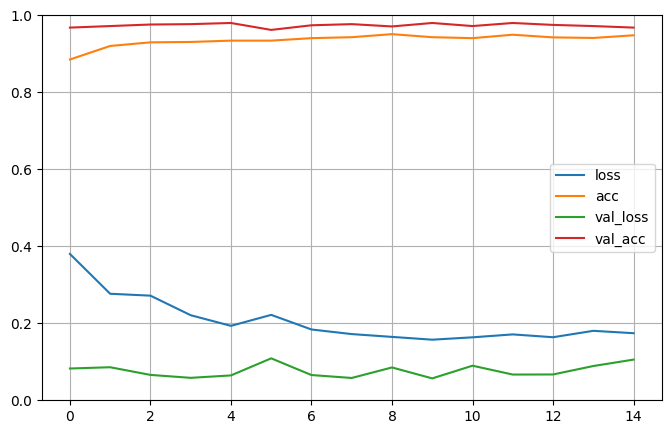

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
hist_df=pd.DataFrame(history.history)

In [ ]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

50/50 [==============================] - 138s 3s/step - loss: 0.0820 - acc: 0.9720


[0.08198212832212448, 0.972000002861023]